In [44]:
import pandas as pd

In [45]:
df1 = pd.read_excel('/content/drive/MyDrive/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Salvador.xlsx')

In [46]:
df = pd.concat([df1,df2,df3,df4,df5])

In [47]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [48]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [49]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [50]:
df['LojaID'] = df['LojaID'].astype('object')

In [51]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [52]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [53]:
df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)

In [54]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [55]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
118,Recife,2019-03-02,17.70,981,5
109,Salvador,2019-03-02,124.37,1035,1
0,Salvador,2018-01-01,31.06,1037,3
6,Natal,2018-07-02,322.00,852,4
225,Natal,2019-01-02,36.23,1035,1
119,Aracaju,2018-01-01,9.32,1523,6
92,Fortaleza,2019-01-01,3.49,1005,4
76,Aracaju,2018-01-01,33.51,1523,4
4,Aracaju,2018-01-01,24.51,1522,8
128,Salvador,2019-03-02,36.84,1034,1


In [56]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [57]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [58]:
df['Receita/vendas'] = df['Receita'] / df['Vendas']

In [59]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [60]:
df['Receita'].max()

3544.0

In [61]:
df['Receita'].min()

3.34

In [62]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [63]:
df.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [64]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [65]:
df.sort_values('Receita',ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [66]:
df['Data'] = df['Data'].astype('int')
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/vendas    float64
dtype: object

In [71]:
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/vendas           float64
dtype: object

In [74]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [75]:
df['Ano_venda'] = df['Data'].dt.year

In [78]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019
62,Natal,2018-02-10,793.00,854,4,3172.00,4.0,2018
50,Salvador,2019-01-01,44.87,1036,3,134.61,3.0,2019
9,Fortaleza,2019-01-01,11.17,1002,6,67.02,6.0,2019
113,Fortaleza,2019-03-02,38.63,980,2,77.26,2.0,2019


In [79]:
df['Mes_venda'], df['Dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [80]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mes_venda,Dia_venda
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,2.0,2019,1,1
145,Natal,2019-01-02,84.62,1034,2,169.24,2.0,2019,1,2
67,Natal,2019-02-14,379.00,852,2,758.00,2.0,2019,2,14
49,Natal,2019-04-01,831.00,852,2,1662.00,2.0,2019,4,1
93,Aracaju,2018-01-01,188.70,1523,1,188.70,1.0,2018,1,1


In [81]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [82]:
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mes_venda,Dia_venda,diferenca_dias
31,Fortaleza,2019-01-01,23.46,1002,4,93.84,4.0,2019,1,1,365 days
124,Recife,2019-03-02,47.98,983,7,335.86,7.0,2019,3,2,425 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days
171,Salvador,2019-01-02,136.45,1035,3,409.35,3.0,2019,1,2,366 days
166,Salvador,2019-01-02,111.72,1035,3,335.16,3.0,2019,1,2,366 days


In [83]:
df['trimestre_venda'] = df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mes_venda,Dia_venda,diferenca_dias,trimestre_venda
188,Natal,2019-01-02,178.11,1035,3,534.33,3.0,2019,1,2,366 days,1
203,Salvador,2019-01-02,37.75,1035,2,75.50,2.0,2019,1,2,366 days,1
52,Aracaju,2018-01-01,14.76,1520,3,44.28,3.0,2018,1,1,0 days,1
48,Natal,2018-09-20,676.00,852,4,2704.00,4.0,2018,9,20,262 days,3
59,Aracaju,2018-01-01,15.07,1523,7,105.49,7.0,2018,1,1,0 days,1


In [88]:
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [89]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mes_venda,Dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualização de dados

In [90]:
df['LojaID'].value_counts(ascending = False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

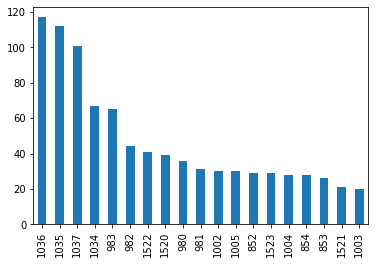

In [102]:
df['LojaID'].value_counts().plot.bar()

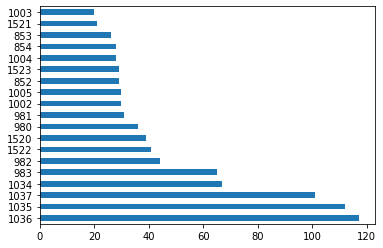

In [103]:
df['LojaID'].value_counts().plot.barh()

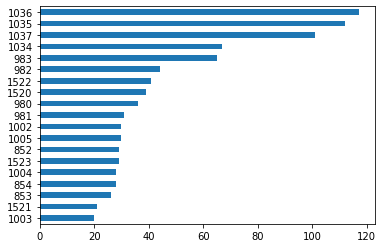

In [105]:
df['LojaID'].value_counts(ascending = True).plot.barh();

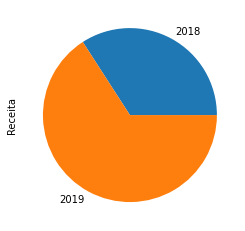

In [108]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [109]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

In [111]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

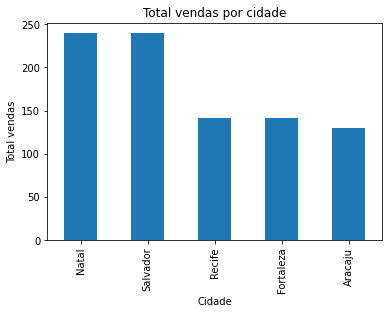

In [117]:
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

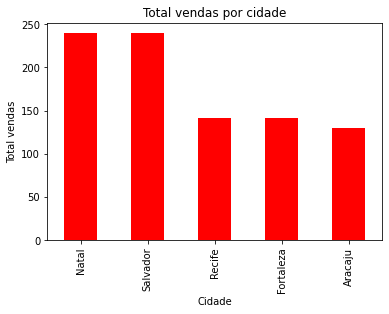

In [118]:
 import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = 'Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [129]:
plt.style.use('fast')

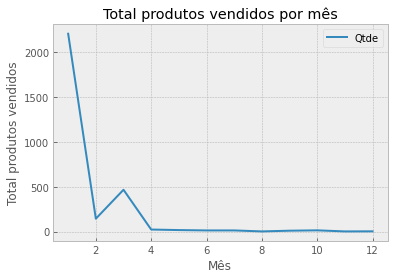

In [132]:
df.groupby(df['Mes_venda'])['Qtde'].sum().plot(title = 'Total produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos');
plt.legend();

In [133]:
df.groupby(df['Mes_venda'])['Qtde'].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [134]:
df_2019 = df[df['Ano_venda'] == 2019]

In [141]:
df_2019.groupby(df_2019['Mes_venda'])['Qtde'].sum()

Mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

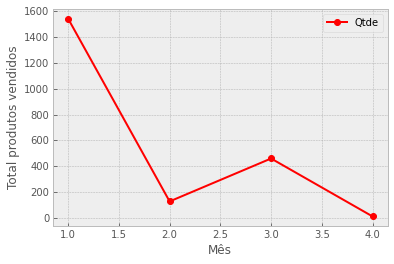

In [144]:
df_2019.groupby(df_2019['Mes_venda'])['Qtde'].sum().plot(marker = 'o', color = 'red')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos');
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

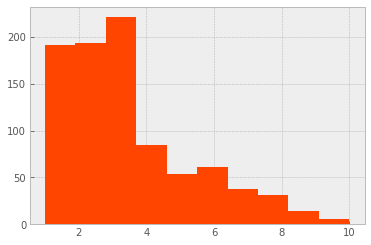

In [148]:
plt.hist(df['Qtde'], color = 'orangered')

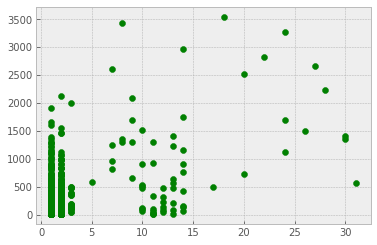

In [153]:
plt.scatter(x = df_2019['Dia_venda'], y = df_2019['Receita'], color = 'green');

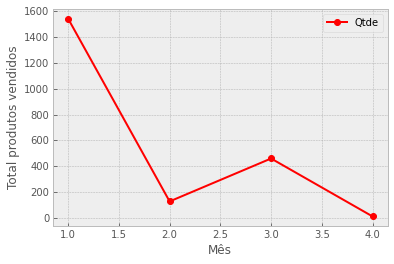

In [154]:
df_2019.groupby(df_2019['Mes_venda'])['Qtde'].sum().plot(marker = 'o', color = 'red')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos');
plt.legend();
plt.savefig('Grafico QTDE x Mes.png')